In [14]:
import numpy as np
import pandas as pd
import os
from rendering import renduFitness, renduModel
import pandas as pd


## Partie 01 : Modification des paramètres de l'équation diffusion par CMA-ES
### Auteurs : Milo et Mohamed
Dans cette partie nous présentons les résultats que nous avons obtenus durant l'étude d'une approche permettant l'optimisation des paramètres de réaction diffusion par un algorithme CMA-ES.
#### 1/Interface Simulateur et Mesures implémentées : 
Pour les besoins de la simulation nous avons développés et intégrer a notre code interface
qui nous permettait d'executer des simulations plusieurs fonctions permettant de calculer différentes mesures
caractérisant la structure de l'essaim.
Par exemple, une execution classique se fait comme suit : 

debug :  /home/mohamed/PycharmProjects/Projet_Kilobots


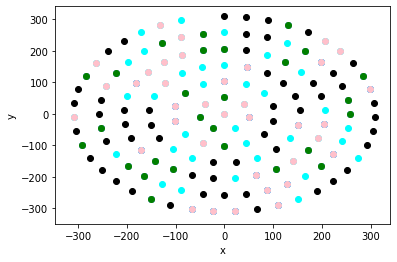

In [3]:
from Src.controllers.swarmDescriptor import swarmDescriptor
"""
Le paramètre précisé sert a distinguer 
le simulateur avec lequel on interragis
"""
SD = swarmDescriptor("morphogenesis")
SD.setTime(500)
SD.controller.withVisiblite(False)
SD.setTopology("pile")
SD.setNb_robots(150)
SD.executeSimulation()
SD.genererRendu()

Ensuite le calcul de plusieurs mesures a été implémenté : 

{'id': 1, 'size': 150, 'shape_index': 1.1887784341378105, 'elements': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]}


<Figure size 432x288 with 0 Axes>

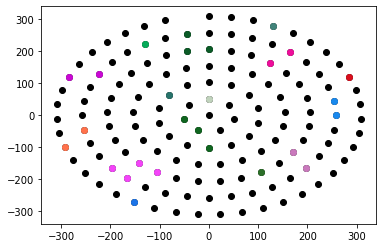

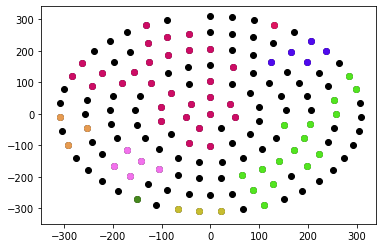

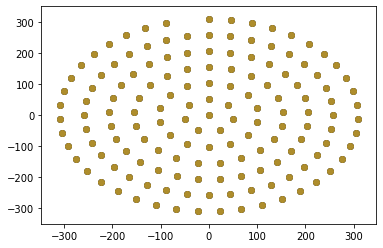

In [4]:
#Calcul des shapes index des différents clusters
SD.clusteriser()
SD.shapeIndex()
for c in SD.clusters:
    print(c)
#Ceci permet de calculer le nombre de Turing Spot
SD.calculerTuringSpots(4)
SD.renduTuringSpot(restedespoints=True)
SD.calculerTuringSpots(2)
SD.renduTuringSpot(restedespoints=True)
#Utiliser 0 par seuil peut s'avérer utile pour visualiser les clusters
SD.calculerTuringSpots(0)
SD.renduTuringSpot(True)

#### 2/Algorithme évolutionnaire : 
A présent que l'interface et les mesures ont étés implémentés, nous pouvons essayer différentes façons de modifier 
les paramètres de l'équation de réaction diffusion.
Pour ce faire il faut déterminer 4 choses : 
* Paramètrage du CMA-ES
* Paramètrage de la simulation
* Fonction Fitness
* Structure du génotype (les variables a modifier) 

Nous allons aborder les trois aspects et leur impact sur l'optimisation de l'essaim de ce qui suivra.

##### a)Fonction Fitness (naivement): 
D'abord, nous allons étudier l'impact de la variation de la fonction fitness sur l'éxécution du CMA-ES
Nous fixerons naivement les paramètres de la simulation et le génotype serra composé de tous les paramètres
de l'équation de réaction diffusion.
Nous executons chaque algorithme sur 200 itérations puis nous affichons un rendu.

D'abord nous commençons par expérimenter l'utilisation du nombre de Turing Spots

In [ ]:
renduFitness("Turing Spot",50,sigma = 0.1)

#Affichage des concentrations 
df = pd.DataFrame(SD.concentrations)
print(df)

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=825659, Sat Mar 21 19:17:25 2020)


debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 9 (seed=1000746, Sat Mar 21 18:37:14 2020)


/home/mohamed/PycharmProjects/Projet_Kilobots/Src/milolib/topologyCalculs.py:229: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 -2.076740424045807e+00 1.0e+00 9.54e-04  9e-04  1e-03 1:07.3
    2     20 -2.029721164859114e+00 1.2e+00 9.45e-04  9e-04  1e-03 2:11.3


/home/mohamed/PycharmProjects/Projet_Kilobots/rendering.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  S.Swarm.shapeIndex()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

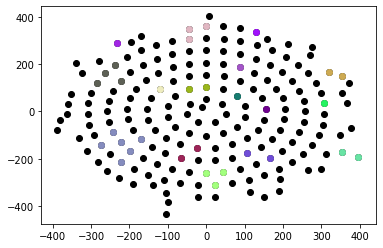

In [6]:
renduFitness("Shape Index",40,sigma = 0.001)

Pour un petit sigma ça fonctionne relativement bien, a noter cependant que certains paramètres sont trés peu impactants comme par exemple les coefficiens de diffusions pour lesquels une variation de 0.001 n'est pas significative (car ils sont de l'ordre de 10²)
##### b)Structure du génotype : 
Dans cette partie nous expérimentons le fait de modifier la structure du génotype, par exemple
nous pouvons considérer un genotype qui n'est pas composé des paramètres de la réaction mais seulement de la diffusion comme suit.

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=985620, Sat Mar 21 19:08:31 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 -3.000000000000000e+01 1.0e+00 4.88e-01  5e-01  5e-01 0:36.9
    2     12 -3.000000000000000e+01 1.2e+00 4.29e-01  4e-01  4e-01 1:13.6
    3     18 -3.000000000000000e+01 1.3e+00 3.85e-01  3e-01  4e-01 1:49.0
    4     24 -3.100000000000000e+01 1.5e+00 3.09e-01  2e-01  3e-01 2:25.6


<Figure size 432x288 with 0 Axes>

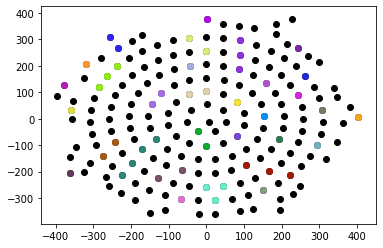

In [13]:
renduModel("Turing Spot",20,sigma = 1,Model=("D_u","D_v"))

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=925479, Sat Mar 21 19:03:45 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 -1.396291662070055e+01 1.0e+00 1.12e+00  1e+00  1e+00 0:40.9
    2     12 -2.182624889028313e+01 1.2e+00 8.74e-01  8e-01  8e-01 1:21.4
    3     18 -2.232609105278807e+01 1.2e+00 1.11e+00  1e+00  1e+00 2:13.1
    4     24 -2.098384469140133e+01 1.1e+00 1.04e+00  9e-01  1e+00 2:54.7


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

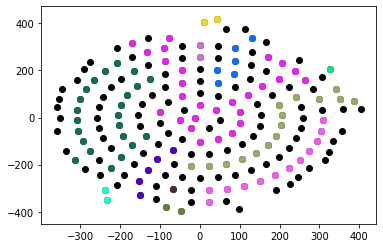

In [12]:
renduModel("Shape Index",20,sigma = 1,Model=("D_u","D_v"))

Donc on voit bien que dans les deux cas ça fonctionne beaucoup mieux de ne pas manipuler simulanément tous les paramètres.
De plus comme on n'influe pas sur la réaction il y a beaucoup moins de risques d'overflow sur les registres des robots.